In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("insta.csv")
print(df.tail())
df["Date"] = pd.to_datetime(df["Date"])

           Date  Instagram reach
395  2023-05-01            47244
396  2023-05-02            45073
397  2023-05-03            45577
398  2023-05-04            47525
399  2023-05-05            50993


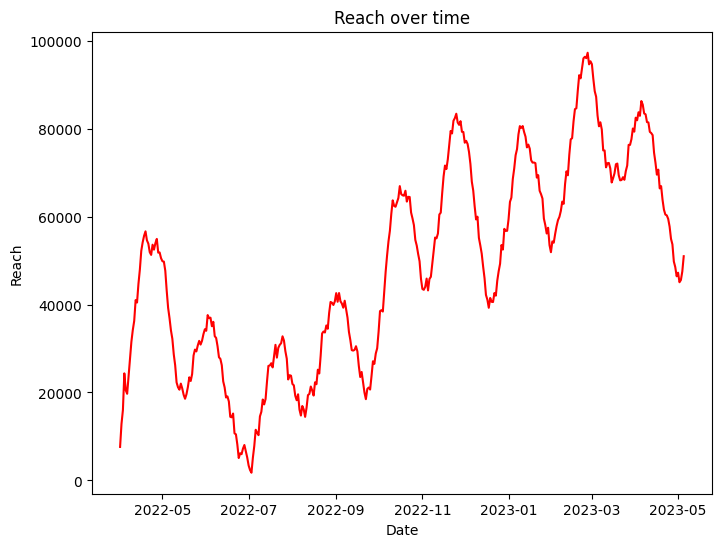

In [2]:
plt.figure(figsize=(8,6))
plt.plot(df["Date"], df["Instagram reach"], color="red")
plt.xlabel("Date")
plt.ylabel("Reach")
plt.title("Reach over time")
plt.show()

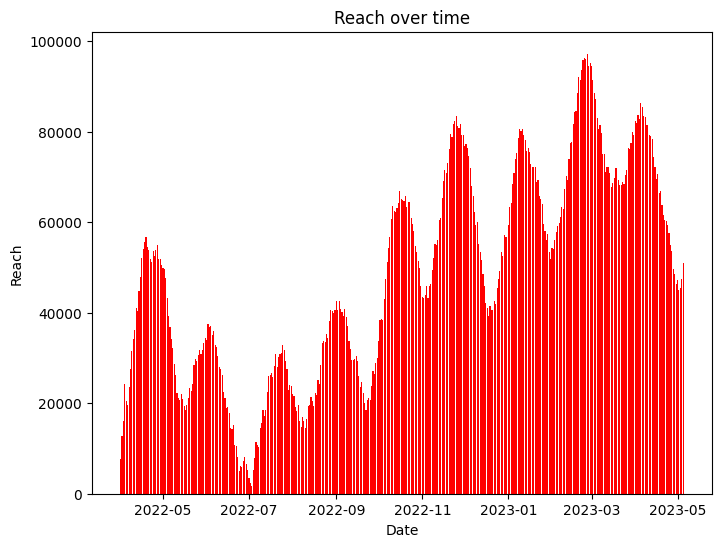

In [3]:
plt.figure(figsize=(8,6))
plt.bar(df["Date"], df["Instagram reach"], color="red")
plt.xlabel("Date")
plt.ylabel("Reach")
plt.title("Reach over time")
plt.show()

In [4]:
df["Day"] = df["Date"].dt.day_name()
print(df.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


In [5]:
day = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()

In [6]:
print(day)

         Day          mean   median           std
0     Friday  48083.448276  50390.5  23724.745991
1     Monday  49111.631579  49277.0  23381.685533
2   Saturday  48204.157895  50543.0  23725.284949
3     Sunday  48603.000000  49840.0  23768.604617
4   Thursday  48870.280702  47525.0  23486.229675
5    Tuesday  48781.666667  49376.0  23378.778852
6  Wednesday  48798.754386  48638.0  23685.946136


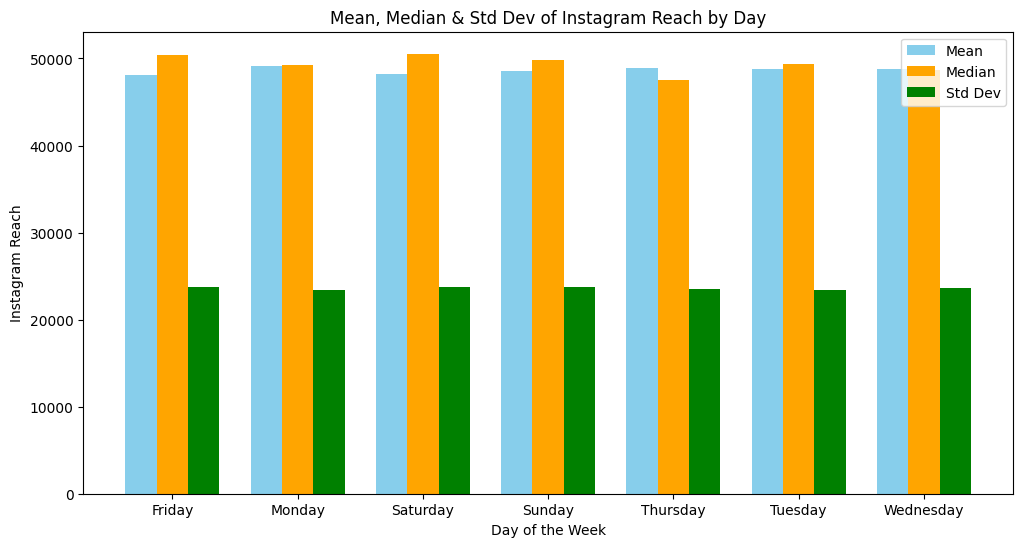

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Your dataframe is 'day'
labels = day['Day']
mean_vals = day['mean']
median_vals = day['median']
std_vals = day['std']

x = np.arange(len(labels))  # positions for bars
width = 0.25  # bar width

plt.figure(figsize=(12,6))

# Plot bars side by side
plt.bar(x - width, mean_vals, width, label='Mean', color='skyblue')
plt.bar(x, median_vals, width, label='Median', color='orange')
plt.bar(x + width, std_vals, width, label='Std Dev', color='green')

# X-axis labels
plt.xticks(x, labels)

plt.xlabel("Day of the Week")
plt.ylabel("Instagram Reach")
plt.title("Mean, Median & Std Dev of Instagram Reach by Day")
plt.legend()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_23048\124768764.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


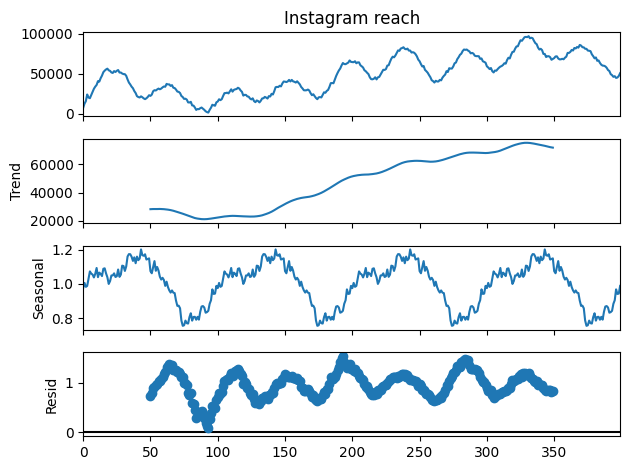

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Instagram reach"], model="multiplicative", period=100)

fig = result.plot()
fig.show()

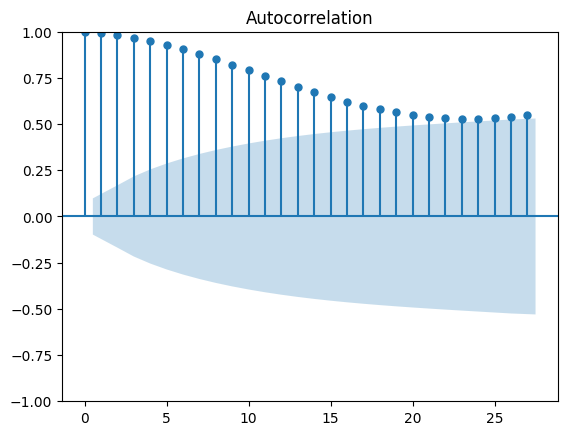

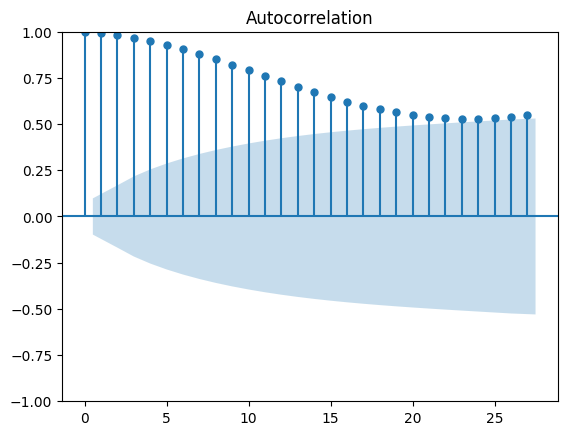

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Instagram reach"])

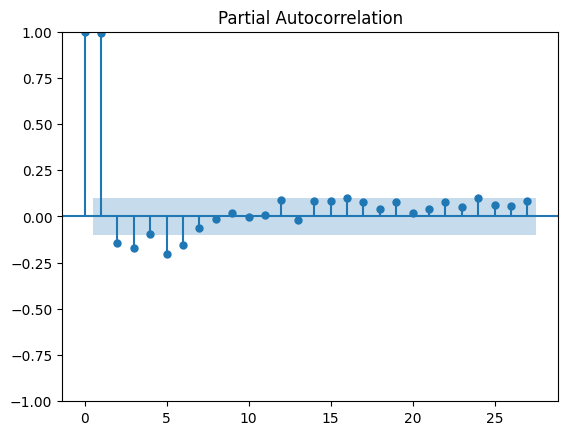

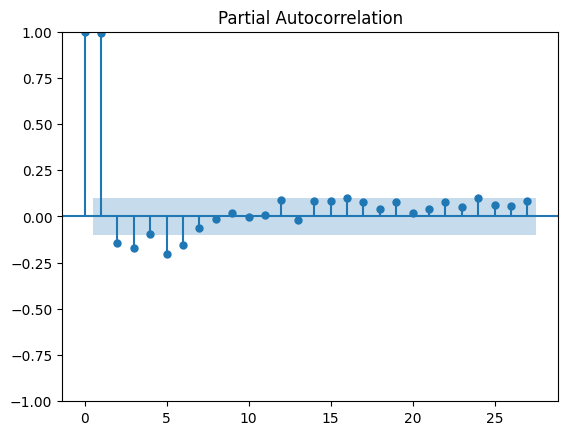

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Instagram reach"])

In [ ]:
p, d, q = 1, 1, 1

import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df["Instagram reach"], order=(p, d, q), seasonal_order = (p, d, q ,12))
model = model.fit(maxiter=50)
print(model.summary())